# Problem of the Week 6

Name: Adarsh Mallya

Student ID: 017086225

Date: 09/28/2025

**Motivation**

This week's Problem of the Week is provides a reflection on the ensemble learning technique we encountered this week in lecture 6-1 - the majority voting approach.

**Completing this assignment**

To complete this assignment, fill in the markdown cells with your responses. When complete, upload this notebook as a Jupyter notebook AND a PDF to Canvas.

In [1]:
# import any python modules you need for this assignment here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

## Problem 6.1: Penguins Revisited

In homework 2, you implemented two different classifiers to assign sexes to penguins based on morphometric features. In the coding cells below, read in the penguin data as you did for homework 2 and re-implement your classifiers.

In [2]:
# Read in the penguin data and standardize it
df = pd.read_csv('adelie_penguins.csv')

# form the design matrix with two of the model features
X = df[['Body_weight', 'Bill_length']]

# standardize the data
body_weight_norm = (df['Body_weight'] - np.mean(df['Body_weight'])) / np.std(df['Body_weight'])
bill_length_norm = (df['Bill_length'] - np.mean(df['Bill_length'])) / np.std(df['Bill_length'])
X_norm = np.column_stack([body_weight_norm, bill_length_norm])
df['Classification'] = 0
df.loc[df['Sex'] == 'F', 'Classification'] = 1

# form the target data vector
y = df['Classification']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [3]:
# Implement your first classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [4]:
# Implement your second classifier
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
y_pred_logreg = logistic_regression_model.predict(X_test)

## Problem 6.2: Majority Voting

Next, leverage your two classifiers to implement a majority voting classifier.

In [5]:
# implement a majority voting classifier
voters = [('KNN', knn), ('Logistic Regression', logistic_regression_model)]
voting_classifier = VotingClassifier(voters)
voting_classifier.fit(X_train, y_train)
y_pred_voting = voting_classifier.predict(X_test)

## Problem 6.3: Classification Plots

In class, we wrote a `classify_domain` function to shade our plots according to the classification. Implement that here and create three side-by-side plots with the results of each of your classifiers (the two from homework 2, and the new majority voting classifier).

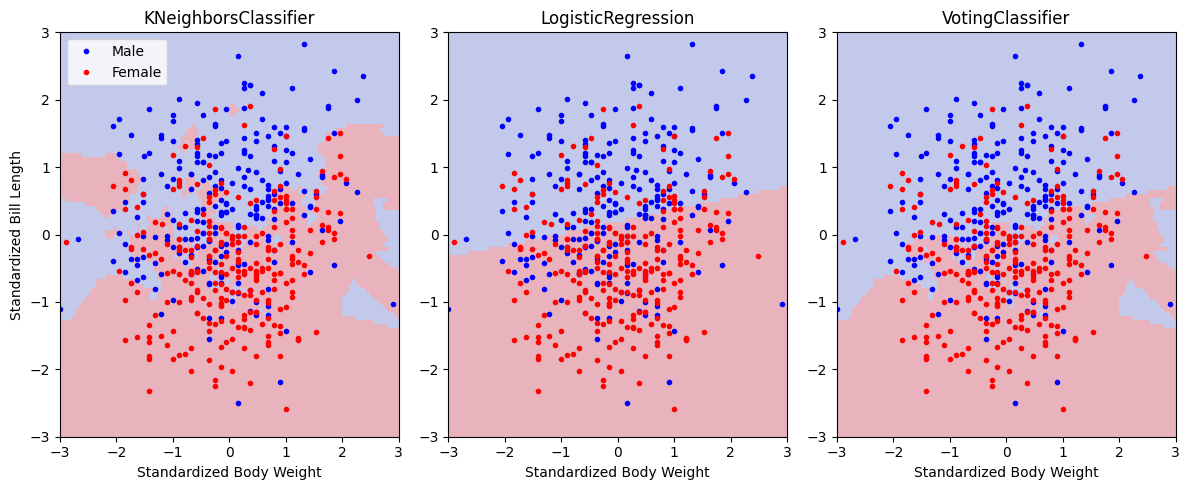

In [6]:
# create your plot here
min_x = -3
max_x = 3
min_y = -3
max_y = 3

def classify_domain(model, X, y):
    x1 = np.linspace(min_x, max_x, 100)
    x2 = np.linspace(min_y, max_y, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Y_pred = model.predict(np.column_stack([X1.ravel(), X2.ravel()])).reshape(X1.shape)
    return(X1, X2, Y_pred)

models = [knn, logistic_regression_model, voting_classifier]

fig = plt.figure(figsize=(12,5))

for m, model in enumerate(models):
    X1, X2, Y_pred = classify_domain(model, X_norm, y)
    
    plt.subplot(1, 3, m + 1)
    plt.pcolormesh(X1, X2, Y_pred, alpha=0.3, cmap='coolwarm', shading='auto')
    plt.plot(X_norm[y==0,0], X_norm[y==0,1],'b.',label='Male')
    plt.plot(X_norm[y==1,0], X_norm[y==1,1],'r.',label='Female')

    plt.title(model.__class__.__name__)
    plt.gca().set_xlim([min_x, max_x])
    plt.gca().set_ylim([min_y, max_y])
    plt.xlabel('Standardized Body Weight')
    
    if m==0:
        plt.ylabel('Standardized Bill Length')
        
        plt.legend(loc=2)
        
plt.tight_layout()
plt.show()

## Problem 6.4: Model Interpretation

How is your new majority voting model performing relative to the previous classifiers? How do you know whether your model is better or worse? Write 3-5 sentences below answer these questions. Be sure to include any pertinent plots or metrics that have supported your conclusions.

The majority voting model appeared to do slightly better than the previous classifiers. Looking at the plots, it appeared the majority voting model was able to capture the features of the data a little more accurately than the KNN and Logistic Regression models could. The Logistic Regression model was rather basic, as it tried to simply establish a linear classification, while the KNN model was a little closer but still misclassified many points. The majority voting model also misclassified multiple points but was more accurate than the other two.